In [1]:
import math
import io
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from pytorch_msssim import ms_ssim

In [ ]:
from ipywidgets import interact, widgets

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
metric = 'mse'  # only pre-trained model for mse are available for now
quality = 6     # lower quality -> lower bit-rate (use lower quality to clearly see visual differences in the notebook)

In [5]:
import sys
img = Image.oimg = Image.open('/trinity/home/a.jha/scripts/kodak_images/kodim03.png').convert('RGB')
x = transforms.ToTensor()(img).unsqueeze(0).to(device)
# x = transforms.ToTensor()(img).unsqeeze(0)
x.size()

torch.Size([1, 3, 512, 768])

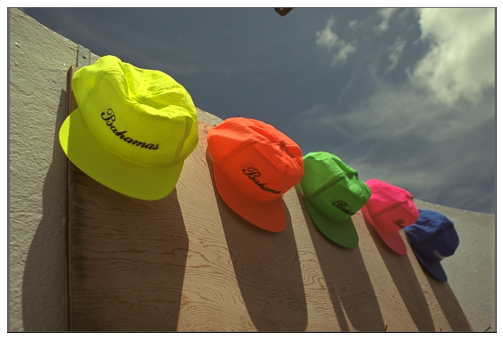

In [6]:
%matplotlib inline
plt.figure(figsize=(9, 6))
plt.axis('off')
plt.imshow(img)
plt.show()

In [16]:
from compressai import zoo
import sys

# model = zoo.bmshj2018_hyperprior(quality=quality, pretrained=True).cuda()
model = zoo.mbt2018_mean(quality=quality, pretrained=True).cuda()
model.eval()
model.update()

compress = model.compress(x)
y = model.g_a(x)
z = model.h_a(torch.abs(y))

In [17]:
with torch.no_grad():
    sigma = model.h_s(z)

In [18]:
y.shape

torch.Size([1, 320, 32, 48])

In [10]:
y = y[:, [0,2]]

In [11]:
# y = y.cpu().detach().numpy()

In [12]:
y.shape

torch.Size([1, 2, 32, 48])

In [13]:
# compression = {"bmshj2018_hyperprior": transforms.ToPILImage()(y.squeeze())}
compression = {"mbt2018_mean": transforms.ToPILImage()(y.squeeze())}

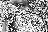

In [14]:
compression["mbt2018_mean"]

In [29]:
decompress = model.decompress(**compress)

In [30]:
decompress['x_hat'].shape

torch.Size([1, 3, 512, 768])

In [31]:
reconstructions = {"mbt2018_mean": transforms.ToPILImage()(decompress['x_hat'].squeeze())}

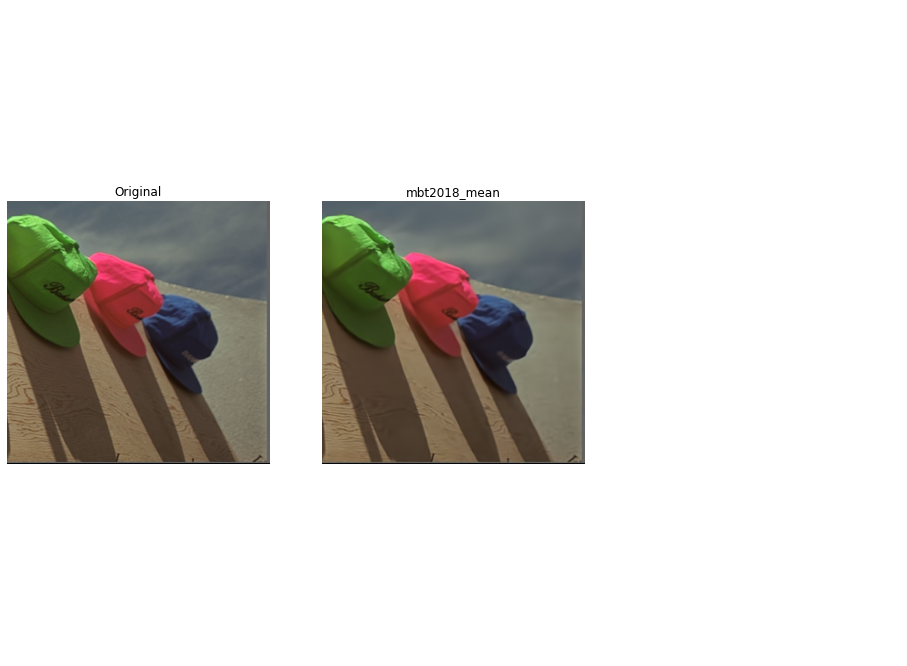

In [32]:
fix, axes = plt.subplots((len(reconstructions) + 2)// 3, 3, figsize=(16, 12))
for ax in axes.ravel():
    ax.axis('off')
   
#axes.ravel()[0].imshow(img.crop((468, 212, 768, 512)))
axes.ravel()[0].imshow(img.crop((468, 212, 768, 512)))
axes.ravel()[0].title.set_text('Original')
    
for i, (name, rec) in enumerate(reconstructions.items()):
    axes.ravel()[i + 1].imshow(rec.crop((468, 212, 768, 512))) # cropped for easy comparison
    axes.ravel()[i + 1].title.set_text(name)

plt.show()